In [169]:
import sys
from itertools import combinations
from math import sin
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../code/")

import xgi
from hypersync_draw import *
from hypersync_generate import *
from hypersync_identify import *
from hypersync_integrate import *

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

In [84]:
N = 100
nreps = 1003
suf = "di" #"di"

In [170]:
file_name = f"../data/freq.txt"

k2s = np.arange(0, 5, 0.5)

df = pd.read_csv(file_name, sep=" ")
df["k2"] = k2s
df = df.melt(id_vars="k2", value_name="proba", var_name="q")
df["q"] = df["q"].astype(int)
df["state"] = df["q"].apply(lambda x: "non-twist" if x > 98 else f"{x}-twisted")

df["ostate"] = df["q"].apply(lambda x: "non-twist" if x > 98 else f"$q={x}$")


df

,k2,q,proba,state,ostate
0,0.0,-6,0.00000,-6-twisted,$q=-6$
1,0.5,-6,0.00000,-6-twisted,$q=-6$
2,1.0,-6,0.00000,-6-twisted,$q=-6$
3,1.5,-6,0.00001,-6-twisted,$q=-6$
4,2.0,-6,0.00010,-6-twisted,$q=-6$
...,...,...,...,...,...
135,2.5,99,0.56715,non-twist,non-twist
136,3.0,99,0.80490,non-twist,non-twist
137,3.5,99,0.90558,non-twist,non-twist
138,4.0,99,0.97219,non-twist,non-twist


In [171]:
mask_pos = df["q"] >= 0
mask_nobig = (98 < df["q"]) + (df["q"] < 5)

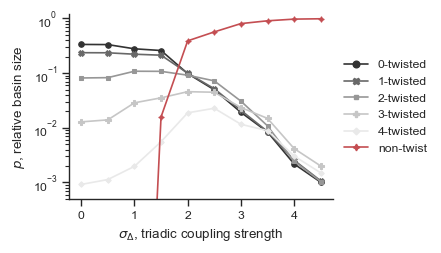

In [172]:
#labels = [f"{i}-twisted" for i in range(5)] + ["other"]
labels = [i for i in df[mask_pos*mask_nobig].state.unique() if "twisted" in i] + ["non-twist"]

fig, ax = plt.subplots(figsize=(3.4, 2.4))
g = sb.lineplot(
    data=df[mask_pos*mask_nobig],
    x="k2",
    y="proba",
    hue="state",
    markers=True,
    ax=ax,
    #alpha=0.7,
    style="state",
    dashes=False,
    #hue_order=labels,
    ms=4,
    mec=None,
    #mfc="w",
    palette=sb.color_palette("Greys_r", n_colors=len(labels)-1) + ["r"]
)

g.set(yscale="log")
sb.move_legend(g, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="")

ax.set_xlabel(r"$\sigma_{\Delta}$, triadic coupling strength")
ax.set_ylabel("$p$, relative basin size")

#title = f"ring {suf}, N={N}, nreps={nreps}"
#ax.set_title(title)

sb.despine()
ax.set_ylim(ymin=5e-4, ymax=1.2)

#fig_name = f"basin_size_ring_{suf}_N_{N}_nreps_{nreps}"

plt.savefig(f"{results_dir}figure_2a.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{results_dir}figure_2a.pdf", dpi=250, bbox_inches="tight")

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_36770/2580686071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twisted["q"] = df_twisted["state"].str[:-8].astype(int)


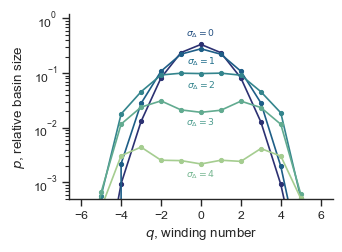

In [166]:
mask_k2 = df["k2"].isin(np.arange(0, 4))
mask_other = df["state"] != "non-twist"

mask_twisted = df["state"].str.contains("twisted")
df_twisted = df[mask_twisted]
df_twisted["q"] = df_twisted["state"].str[:-8].astype(int)
mask_k2 = df_twisted["k2"].isin(np.arange(0, 5))


fig, ax = plt.subplots(figsize=(3.4, 2.4))
g = sb.lineplot(
    data=df_twisted[mask_k2],
    hue="k2",
    y="proba",
    x="q",
    marker="o",
    ms=3,
    #mfc="w",
    mec=None,
    ax=ax,
    #alpha=0.7,
    #style="k2",
    dashes=False,
    #legend="full",
    palette="crest_r",
    legend=False,
)

g.set(yscale="log")
#sb.move_legend(g, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="$\sigma_{\Delta}$")

from labellines import labelLine, labelLines
k2s = list(range(5))
#for i, line in enumerate(g.axes.get_lines()):
#    line.set_label(k2s[i])

#labelLines(g.axes.get_lines(), zorder=2.5, xvals=[0]*5, fontsize="x-small")

colors = sb.color_palette("crest_r", n_colors=len(k2s))
heights = [0.12, 0.4, 0.6, 0.73, 0.88][::-1]
for i in range(len(k2s)):
    ax.text(0.5, heights[i], rf"$\sigma_{{\Delta}} = {k2s[i]}$", transform=ax.transAxes, ha="center", fontsize="x-small", c=colors[i])

sb.despine()

#plt.xticks(rotation=45)
ax.set_xlabel("$q$, winding number")
ax.set_ylabel("$p$, relative basin size")

title = f"ring {suf}, N={N}, nreps={nreps}"
#ax.set_title(title)

sb.despine()
ax.set_ylim(ymin=5e-4, ymax=1.2)

plt.savefig(f"{results_dir}figure_2b.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{results_dir}figure_2b.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [146]:
cols = 

[0, 1, 2, 3, 4, 5]

In [153]:
sb.color_palette("crest_r", n_colors=len(k2s))

[(0.13865499, 0.30988598, 0.50636017),
 (0.11409965, 0.42169502, 0.54065622),
 (0.20350004, 0.5231837, 0.55370601),
 (0.31270304, 0.62072111, 0.56379321),
 (0.46364792, 0.71617961, 0.56674986)]

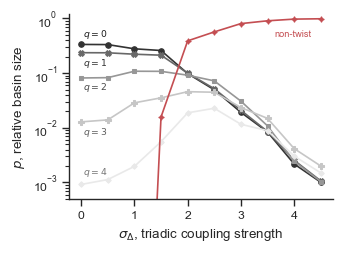

In [201]:
#labels = [f"{i}-twisted" for i in range(5)] + ["other"]
labels = [i for i in df[mask_pos*mask_nobig].ostate.unique() if "q" in i] + ["non-twist"]

fig, ax = plt.subplots(figsize=(3.4, 2.4))
g = sb.lineplot(
    data=df[mask_pos*mask_nobig],
    x="k2",
    y="proba",
    hue="ostate",
    markers=True,
    ax=ax,
    #alpha=0.7,
    style="state",
    dashes=False,
    #hue_order=labels,
    ms=4,
    mec=None,
    #mfc="w",
    palette=sb.color_palette("Greys_r", n_colors=len(labels)-1) + ["r"],
    legend=False
)

g.set(yscale="log")
#sb.move_legend(g, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="")

ax.set_xlabel(r"$\sigma_{\Delta}$, triadic coupling strength")
ax.set_ylabel("$p$, relative basin size")

#title = f"ring {suf}, N={N}, nreps={nreps}"
#ax.set_title(title)

sb.despine()
ax.set_ylim(ymin=5e-4, ymax=1.2)

colors = sb.color_palette("Greys_r", n_colors=len(labels)-1)
heights = [0.13, 0.35, 0.59, 0.72, 0.88][::-1]
for i in range(len(labels)-1):
    ax.text(0.1, heights[i], rf"{labels[i]}", transform=ax.transAxes, ha="center", fontsize="x-small", c="k", alpha=1-i*0.1)

ax.text(0.85, 0.88, rf"{labels[-1]}", transform=ax.transAxes, ha="center", fontsize="x-small", c="r")


#fig_name = f"basin_size_ring_{suf}_N_{N}_nreps_{nreps}"

plt.savefig(f"{results_dir}figure_2a.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{results_dir}figure_2a.pdf", dpi=250, bbox_inches="tight")